In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [ ]:
tick = 90

In [ ]:
df = web.DataReader('GBPUSD=X', data_source= 'yahoo', start= '2012-01-01', end= '2020-07-08')
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,1.554896,1.547604,1.552602,1.551205,0.0,1.551205
2012-01-03,1.562500,1.551109,1.552096,1.552000,0.0,1.552000
2012-01-04,1.567005,1.558263,1.564700,1.564407,0.0,1.564407
2012-01-05,1.562695,1.546910,1.561207,1.560939,0.0,1.560939
2012-01-06,1.552675,1.538201,1.550195,1.550171,0.0,1.550171


In [ ]:
df['Change'] = 100
df.head()

,High,Low,Open,Close,Volume,Adj Close,Change
Date,,,,,,,
2012-01-02,1.554896,1.547604,1.552602,1.551205,0.0,1.551205,100
2012-01-03,1.562500,1.551109,1.552096,1.552000,0.0,1.552000,100
2012-01-04,1.567005,1.558263,1.564700,1.564407,0.0,1.564407,100
2012-01-05,1.562695,1.546910,1.561207,1.560939,0.0,1.560939,100
2012-01-06,1.552675,1.538201,1.550195,1.550171,0.0,1.550171,100


In [ ]:

for i in range(1, df.shape[0]):
  if df['Close'][i] < df['Close'][i-1]:
    res = df['Close'][i] - df['Close'][i-1]
    df['Change'][i]= res
    print('One: ' , res)
  
  elif df['Close'][i] > df['Close'][i-1]:
    res2 = df['Close'][i] - df['Close'][i-1]
    df['Change'][i] = res2
    print('two: ' , res2)

In [ ]:
df.head(15)

,High,Low,Open,Close,Volume,Adj Close,Change
Date,,,,,,,
2012-01-02,1.554896,1.547604,1.552602,1.551205,0.0,1.551205,100
2012-01-03,1.562500,1.551109,1.552096,1.552000,0.0,1.552000,0
2012-01-04,1.567005,1.558263,1.564700,1.564407,0.0,1.564407,0
2012-01-05,1.562695,1.546910,1.561207,1.560939,0.0,1.560939,0
2012-01-06,1.552675,1.538201,1.550195,1.550171,0.0,1.550171,0
2012-01-09,1.547006,1.540002,1.542091,1.541949,0.0,1.541949,0
2012-01-10,1.550051,1.544807,1.545762,1.545906,0.0,1.545906,0
2012-01-11,1.548803,1.534401,1.547389,1.547461,0.0,1.547461,0
2012-01-12,1.536807,1.528351,1.533578,1.533601,0.0,1.533601,0


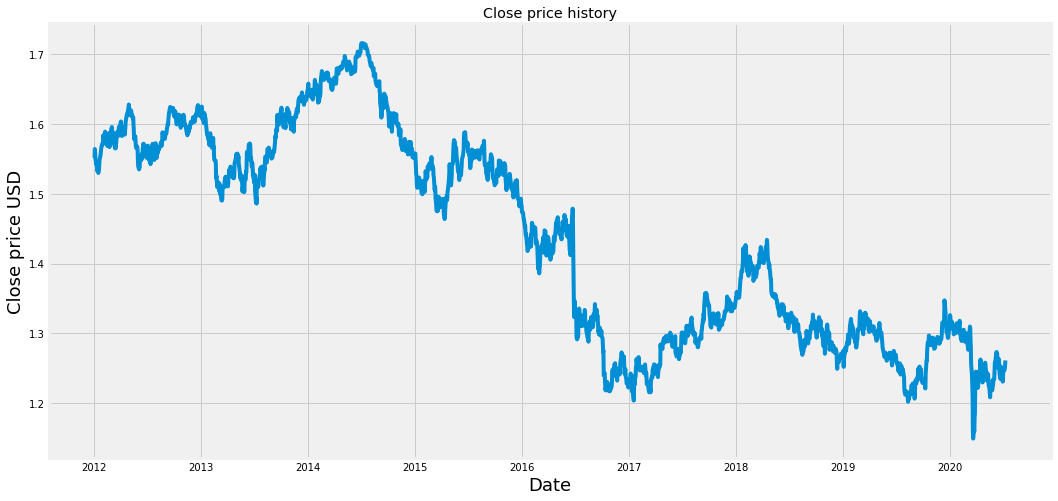

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD', fontsize= 18)
plt.show()

In [ ]:
data = df.filter(['Close'])
dataset = data.values

training_data_len = math.ceil(len(dataset) * 1)

dataset
#training_data_len

array([[1.55120528],
       [1.55199969],
       [1.56440663],
       ...,
       [1.249547  ],
       [1.25428021],
       [1.26135218]])

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.70901907],
       [0.71042101],
       [0.7323162 ],
       ...,
       [0.17666677],
       [0.18501971],
       [0.19749999]])

In [ ]:
#x train y train
train_data = scaled_data[0: training_data_len , :]
x_train = []
y_train = []

for i in range(tick, len(train_data)):
  x_train.append(train_data[i-tick:i, 0])
  y_train.append(train_data[i, 0])

In [ ]:
#convert np
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape
#df.shape

(2130, 90)

In [ ]:
#reshape data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2130, 90, 1)

In [ ]:
#LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
#Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
2130/2130 [==============================] - 118s 55ms/step - loss: 0.0019


In [ ]:
#creating test dataset
test_data = scaled_data[training_data_len - tick: , :]
x_test = []
y_test = dataset[training_data_len: , :]

for i in range(tick, len(test_data)):
  x_test.append(test_data[i-tick:i, 0])

In [ ]:
#convert np array test datas

x_test = np.array(x_test)

In [ ]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(333, 90, 1)

In [ ]:
#getting the predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#getting the accuracy

rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

0.003940633109381965

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
valid['Predictions'].head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Date
2019-04-01    1.307577
2019-04-02    1.304865
2019-04-03    1.304157
2019-04-04    1.305400
2019-04-07    1.305654
Name: Predictions, dtype: float32

TypeError: ignored

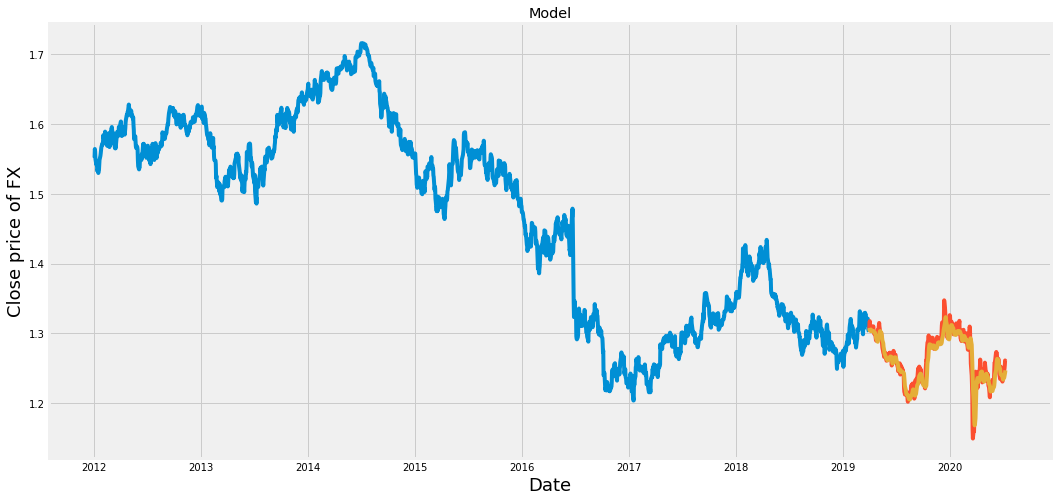

In [ ]:
#plot the data


#visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price of FX', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend('Train', 'Val', 'Predictions', loc='best')
plt.show()

In [ ]:

valid.tail(10)


,Close,Predictions
Date,,
2020-06-28,1.234217,1.239814
2020-06-29,1.231057,1.237850
2020-06-30,1.238927,1.235171
2020-07-01,1.246479,1.233904
2020-07-02,1.246640,1.234792
2020-07-05,1.247552,1.236621
2020-07-06,1.249547,1.238750
2020-07-07,1.254280,1.240981
2020-07-08,1.261352,1.243642


In [ ]:
dif = valid['Close'] - valid['Predictions']
dif.tail(15)

Date
2020-06-21   -0.014294
2020-06-22    0.006143
2020-06-23    0.010824
2020-06-24   -0.000194
2020-06-25    0.001925
2020-06-28   -0.005597
2020-06-29   -0.006793
2020-06-30    0.003756
2020-07-01    0.012574
2020-07-02    0.011848
2020-07-05    0.010931
2020-07-06    0.010797
2020-07-07    0.013299
2020-07-08    0.017710
2020-07-09    0.013306
dtype: float64

In [ ]:
#for last value

jpy_quote = web.DataReader('GBPUSD=X', data_source= 'yahoo', start= '2012-01-01', end= '2020-07-07')
new_df = jpy_quote.filter(['Close'])
last_tick_days = new_df[-tick: ].values
last_tick_days_scaled = scaler.transform(last_tick_days)
X_test = []
X_test.append(last_tick_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[1.2415727]]


In [ ]:
jpy_quote2 = web.DataReader('GBPUSD=X', data_source= 'yahoo', start= '2020-07-07', end= '2020-07-08')
print(jpy_quote2['Close'])

Date
2020-07-06    1.249547
2020-07-07    1.254280
2020-07-08    1.261352
Name: Close, dtype: float64


In [ ]:
4